Задание 1. Изучите технологии attention и архитектуры нейронных сетей трансформеров.

Attention

**Определение**:
Технология attention в нейронных сетях позволяет модели фокусироваться на определенных частях входных данных при выполнении задачи, вместо того чтобы обрабатывать всю информацию равномерно.

**Принцип работы**:

Входные данные и веса: Каждому элементу входных данных присваивается вес, который определяется важностью этого элемента для текущей задачи.

Суммирование с весами: Входные данные умножаются на соответствующие веса и складываются, создавая взвешенную комбинацию. Это позволяет модели фокусироваться на наиболее важных элементах.

Применение:

Машинный перевод: Attention в трансформерах применяется для фокусировки на различных частях входного исходного текста при генерации перевода.

Обработка изображений: В задачах обработки изображений attention используется для фокусировки на различных частях изображения в зависимости от контекста.

**Архитектура Нейронных Сетей Трансформеров**

Основные характеристики:

**Self-Attention**:

Трансформеры используют механизм само-внимания для обработки последовательностей. Каждый элемент последовательности может взаимодействовать с каждым другим с различной степенью важности.

**Многозаголовочность**:

Attention многозаголовочен, что позволяет модели фокусироваться на различных аспектах входных данных одновременно.

Позиционная кодировка:
Трансформеры не сохраняют порядок входных данных, поэтому используют позиционную кодировку для внедрения информации о позиции в последовательность.

**Применение**:

Natural Language Processing (NLP): Трансформеры успешно применяются в задачах обработки естественного языка, таких как машинный перевод, анализ тональности текста и вопросно-ответные системы.
Обработка изображений: Трансформеры также показали выдающиеся результаты в обработке изображений, например, в задачах классификации и генерации изображений.
Изучение этих технологий может открыть понимание современных методов обработки последовательностей и улучшить навыки в области глубокого обучения.

Задание 2. Примените один из трансформеров, например BERT к задаче классификации отзывов клиентов. Сравните полученные результаты с классическими методами машинного обучения, с RNN. Сделайте выводы.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import zipfile
from tqdm import tqdm
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/tink_rev.zip')
for file in tqdm(zf.infolist()):
  zf.extract(file)

100%|██████████| 4/4 [00:13<00:00,  3.41s/it]


In [ ]:
with open('review_description_preprocess.json', 'r') as file:
  review = json.load(file)
    # review = torch.Tensor(review)
print(review[-2])

получить предложение банк заполнить анкета отправить получение карта позвонить центр обслуживание уточнить интересовать вопрос именно покупка безнал беспроцентный период доступно объяснить активировать карта пользоваться карта 3 месяц грейс 0 55 день безналичный расчёт помощь интернет-банка видеть сколько необходимо оплатить какой число переплатить 590 руб плата ежегодный обслуживание недавно увеличить лимит карта общий устраивать


In [ ]:
print(len(review[-2]))

434


In [ ]:
with open('review_rating.json', 'r') as file:
    rating = json.load(file)
print(rating[-2])

5


In [ ]:
pd.Series(rating).value_counts()

5    37418
1    25566
2     5360
4     4040
3     2582
dtype: int64

In [ ]:
import pandas as pd

df = pd.DataFrame({'review': review, 'rating': rating})

selected_reviews = pd.DataFrame(columns=['review', 'rating'])

for rating_value in df['rating'].unique():
    sampled_reviews = df[df['rating'] == rating_value].sample(n=750, random_state=15)

    selected_reviews = selected_reviews.append(sampled_reviews, ignore_index=True)

display(selected_reviews.head())

review = selected_reviews['review'].tolist()
rating = selected_reviews['rating'].tolist()

<ipython-input-9-0f51145b6893>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_reviews = selected_reviews.append(sampled_reviews, ignore_index=True)


,review,rating
0,отличный банк максимально мобильный очень лёгк...,5
1,очень быстро качественно решить проблемма акци...,5
2,банк очень хороший дебетовый карта тинькоф блё...,5
3,выражать благодарность сотрудник банк идти вст...,5
4,очень сильно нравиться работа поддержка тинько...,5


In [ ]:
review_lengths = [len(text.split()) for text in review]

average_length = sum(review_lengths) / len(review_lengths)

print("Средняя длина отзыва:", average_length)

Средняя длина отзыва: 129.0744


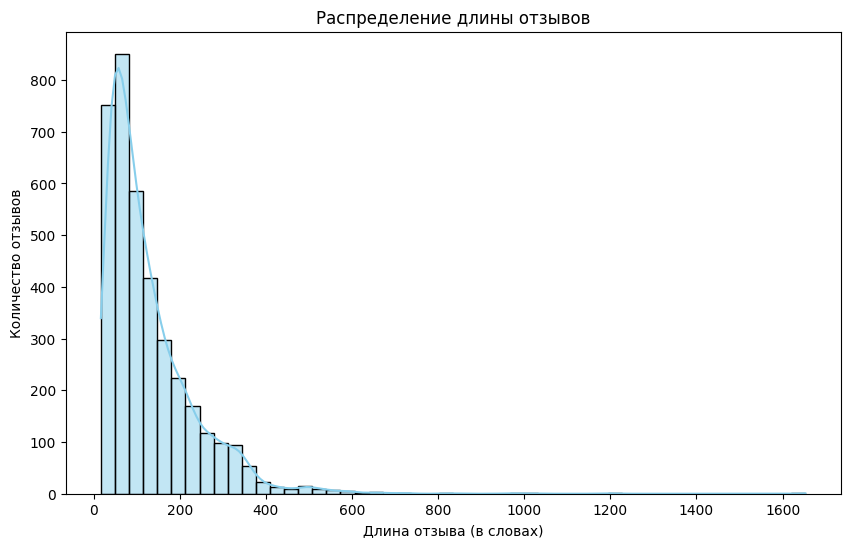

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True, color='skyblue')
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва (в словах)')
plt.ylabel('Количество отзывов')
plt.show()


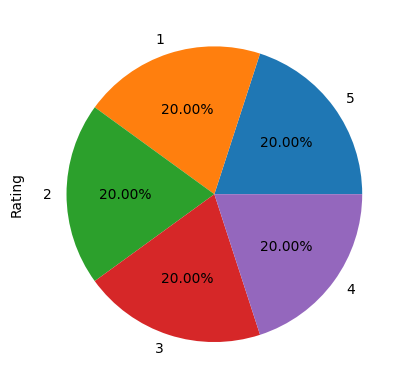

In [ ]:
import matplotlib.pyplot as plt
pd.Series(rating).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel('Rating');

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(review, rating, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny', do_lower_case=False)
model = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny', num_labels=5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Selected device:', device)

Selected device: cuda


In [ ]:
model = model.to(device)

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29564, 312, padding_idx=0)
      (position_embeddings): Embedding(512, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, e

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=200, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=200, return_tensors='pt')

train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_labels))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

In [ ]:
def train(model, train_dl, optimizer):
    model.train()

    total_loss = 0.0
    total_samples = 0.0
    correct_samples = 0.0

    for input_ids, attention_mask, labels in train_dl:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        labels -= 1
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss

        total_samples += labels.shape[0]

        _, prediction_indices = torch.max(outputs.logits, 1)
        correct_samples += torch.sum(prediction_indices==labels)

    train_accuracy = float(correct_samples) / total_samples

    return total_loss, train_accuracy

In [ ]:
def test(model, test_dl):
    model.eval()

    total_loss = 0.0
    total_samples = 0.0
    correct_samples = 0.0

    with torch.no_grad():
        for input_ids, attention_mask, labels in test_dl:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            labels -= 1
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            total_loss += loss

            total_samples += labels.shape[0]
            _, predictions_indices = torch.max(outputs.logits, 1)
            correct_samples += torch.sum(predictions_indices==labels)

    test_accuracy = correct_samples / total_samples

    return total_loss, test_accuracy

In [ ]:
# for param in model.bert.parameters():
#     param.requires_grad = False

# for param in model.classifier.parameters():
#     param.requires_grad = True

In [ ]:
losses_train, losses_test = [], []
for epoch in range(25):
    total_loss_train, train_accuracy = train(model, train_loader, optimizer)
    losses_train.append(total_loss_train.item())
    total_loss_test, test_accuracy = test(model, test_loader)
    losses_test.append(total_loss_test.item())

    print(f"epoch [{epoch+1}]: Loss: [{total_loss_train:.4f}], Train_acc: [{train_accuracy:.4f}],"
                            f" Loss: [{total_loss_test:.4f}], Test_acc: [{test_accuracy:.4f}]")

epoch [1]: Loss: [19.1827], Train_acc: [0.2440], Loss: [4.7396], Test_acc: [0.3027]
epoch [2]: Loss: [18.6499], Train_acc: [0.3377], Loss: [4.5344], Test_acc: [0.3373]
epoch [3]: Loss: [17.6665], Train_acc: [0.3413], Loss: [4.2687], Test_acc: [0.3520]
epoch [4]: Loss: [16.7489], Train_acc: [0.3677], Loss: [4.1385], Test_acc: [0.3733]
epoch [5]: Loss: [16.1153], Train_acc: [0.3880], Loss: [4.0161], Test_acc: [0.3947]
epoch [6]: Loss: [15.4724], Train_acc: [0.4083], Loss: [3.9624], Test_acc: [0.4027]
epoch [7]: Loss: [14.9844], Train_acc: [0.4240], Loss: [3.9470], Test_acc: [0.4040]
epoch [8]: Loss: [14.6093], Train_acc: [0.4513], Loss: [3.8927], Test_acc: [0.3987]
epoch [9]: Loss: [14.1719], Train_acc: [0.4677], Loss: [3.8703], Test_acc: [0.4267]
epoch [10]: Loss: [13.7443], Train_acc: [0.4863], Loss: [3.8700], Test_acc: [0.4013]
epoch [11]: Loss: [13.3728], Train_acc: [0.5073], Loss: [3.8552], Test_acc: [0.4267]
epoch [12]: Loss: [12.9013], Train_acc: [0.5270], Loss: [3.8592], Test_acc

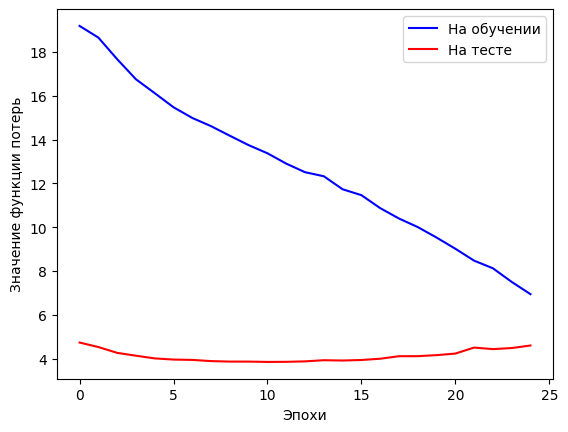

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses_train, label='На обучении', color='blue')
plt.plot(losses_test, label='На тесте', color='red')
plt.legend()
plt.xlabel('Эпохи')
plt.ylabel('Значение функции потерь')
plt.show()

In [ ]:
!pip install pymorphy2

In [ ]:
import torch
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import pymorphy2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Выберите язык для SnowballStemmer (русский)
stemmer = SnowballStemmer("russian")

# Инициализация pymorphy2
morph = pymorphy2.MorphAnalyzer()

# Функция для токенизации, препроцессинга, лемматизации и стемминга текста
def preprocess_and_stem(text):
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text

# Пример текста
positive_review = "Банк просто отличный! Обслуживание на высшем уровне!"

# Препроцессинг, лемматизация и стемминг текста
preprocessed_review = preprocess_and_stem(positive_review)

# Токенизация
tokenized_positive_review = tokenizer(preprocessed_review, truncation=True, padding=True, max_length=250, return_tensors='pt')

model.eval()
with torch.no_grad():
    inputs = {'input_ids': tokenized_positive_review['input_ids'], 'attention_mask': tokenized_positive_review['attention_mask']}
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = model(**inputs)

predicted_rating = torch.argmax(outputs.logits, dim=1).item() + 1

print(f"\nOriginal Review:\n{positive_review}")
print(f"Preprocessed, Lemmatized, and Stemmed Review:\n{preprocessed_review}")
print(f"Predicted Rating: {predicted_rating}")



Original Review:
Банк просто отличный! Обслуживание на высшем уровне!
Preprocessed, Lemmatized, and Stemmed Review:
банк просто отличный обслуживание на высокий уровень
Predicted Rating: 5


In [ ]:

# Инициализация pymorphy2
morph = pymorphy2.MorphAnalyzer()

# Функция для токенизации, препроцессинга и стемминга текста
def preprocess_and_stem(text):
    text = text.lower()
    text = re.sub(r'[a-zA-Z]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [morph.parse(word)[0].normal_form for word in tokens if word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text

# Пример текста
negative_review = "Банк не предоставил возможность отсрочки. Обманул. Не рекомендую никому. Не понравилось совсем, ничем помочь не смогли"

# Препроцессинг и стемминг текста
preprocessed_negative_review = preprocess_and_stem(negative_review)

# Токенизация
tokenized_negative_review = tokenizer(preprocessed_negative_review, truncation=True, padding=True, max_length=250, return_tensors='pt')

model.eval()
with torch.no_grad():
    inputs = {'input_ids': tokenized_negative_review['input_ids'], 'attention_mask': tokenized_negative_review['attention_mask']}
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = model(**inputs)

predicted_rating = torch.argmax(outputs.logits, dim=1).item() + 1

print(f"\nOriginal Review:\n{negative_review}")
print(f"Preprocessed and Stemmed Review:\n{preprocessed_negative_review}")
print(f"Predicted Rating: {predicted_rating}")


Original Review:
Банк не предоставил возможность отсрочки. Обманул. Не рекомендую никому. Не понравилось совсем, ничем помочь не смогли
Preprocessed and Stemmed Review:
банк не предоставить возможность отсрочка обмануть не рекомендовать никто не понравиться совсем ничто помочь не смочь
Predicted Rating: 1


Задание 3. Примените один из трансформеров, например BERT, к задаче генерации англоязычного и русскоязычного текстов. Сравните результаты с LSTM. Сделайте выводы.

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [ ]:
# Генерация текста
input_text = "The day before yesterday"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
attention_mask = torch.ones(input_ids.shape)

output = model.generate(input_ids, max_length=100, attention_mask=attention_mask, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text:")
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
The day before yesterday's meeting, he said: "I'm not going to go into detail about what I'm doing, but I think it's important for us to be able to talk about it.

"We've got a lot of work to do, and we're looking forward to it."


In [ ]:
model_name = 'sberbank-ai/rugpt3small_based_on_gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [ ]:
input_text = "Я попытался обучить модель классификации отзывов"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

output = model.generate(input_ids, max_length=100, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Сгенерированный текст:")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Сгенерированный текст:
Я попытался обучить модель классификации отзывов.

— Да, — сказал я, и в его глазах промелькнуло что-то такое, что заставило меня насторожиться. Я не мог понять, о чем он говорит, но, судя по тому, как он смотрел на меня, я понял: он хочет, чтобы я рассказал ему о своих впечатлениях от увиденного, а не о том, чего я не видел. Он не был уверен, стоит ли мне рассказывать ему об этом. 


Задание 4 Примените один из трансформеров, например BERT, к
задаче машинного перевода.


In [ ]:
!pip install "transformers[sentencepiece]"
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.3 MB/s eta 0:00:00


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-ru-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Привет, как твои дела?"

input_ids = tokenizer.encode(input_text, return_tensors="pt")

output_ids = model.generate(input_ids)

# Декодирование выходных токенов
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("Input text:", input_text)
print("Translated text:", output_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Input text: Привет, как твои дела?
Translated text: Hey, how are you?
